In [30]:
from keras.datasets import boston_housing
from keras import models 
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean 
test_data /= std

In [9]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(65, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [11]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [21]:
for i in range(k): 
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets= np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    vsme, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)


In [22]:
all_scores

[2.0136430995299084, 2.3221436089808396, 2.990133042382722, 2.4927534726586673]

In [23]:
np.mean(all_scores)

2.454668305888034

In [24]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

In [27]:
for i in range(k): 
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets= np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
   



('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)


In [31]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

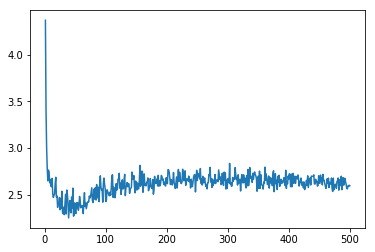

In [32]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)

In [48]:
def smooth_curve(points, factor=0.9): 
    smoothed_points = []
    for point in points: 
        if smoothed_points: 
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor  + point * (1-factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

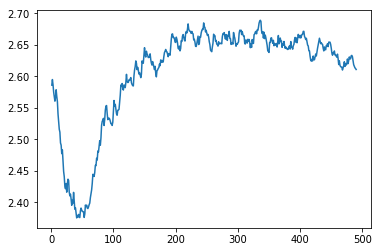

In [49]:
plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)

In [53]:
model = build_model()
model.fit(train_data, train_targets, epochs=50, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [54]:
test_mae_score

2.7691349515727923